In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
def family_name (x):
   a = x.rsplit(',')[0]
   return a 

In [6]:
df['family name'] = df['Name'].apply(family_name)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [8]:
df.drop('family name',axis=1,inplace=True)

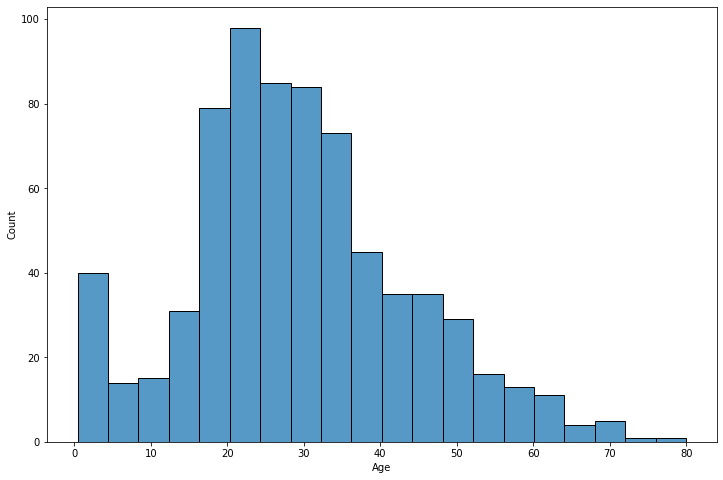

In [9]:
sns.histplot(df['Age'],kde=False)

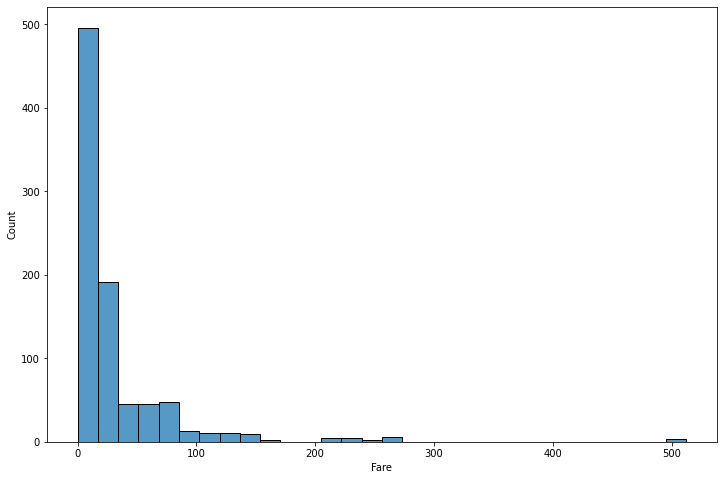

In [10]:
sns.histplot(df['Fare'],bins=30)

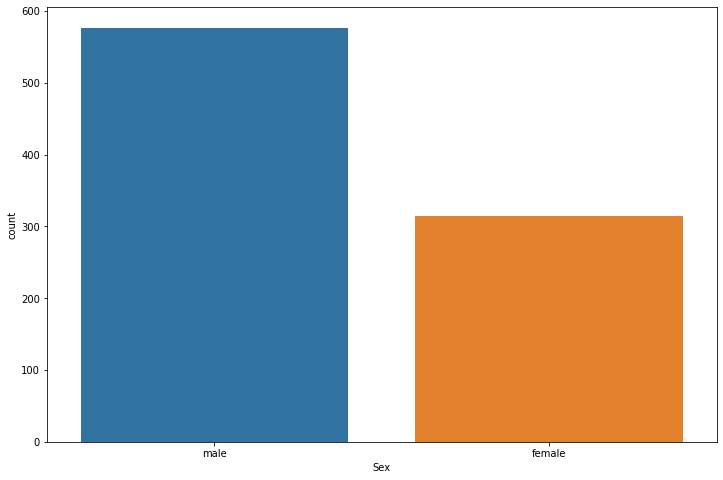

In [11]:
sns.countplot(x='Sex',data=df)

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

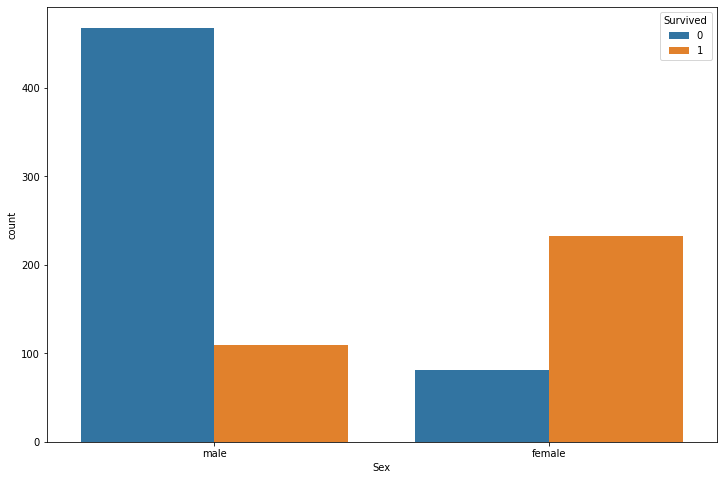

In [13]:
sns.countplot(x='Sex',hue='Survived',data=df)

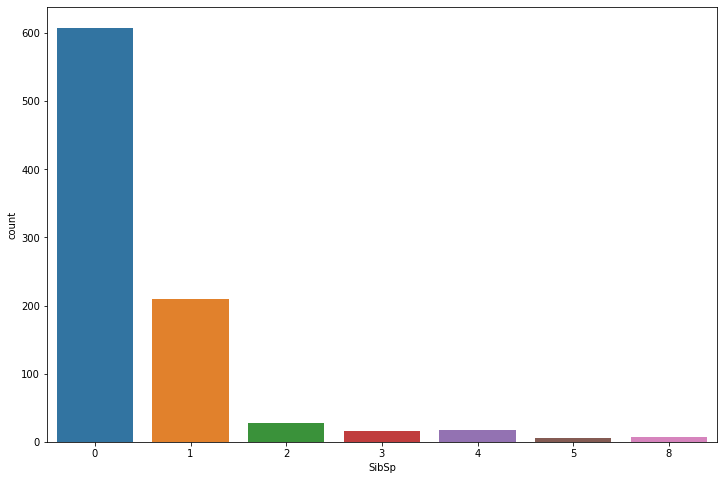

In [14]:
sns.countplot(x='SibSp',data=df)

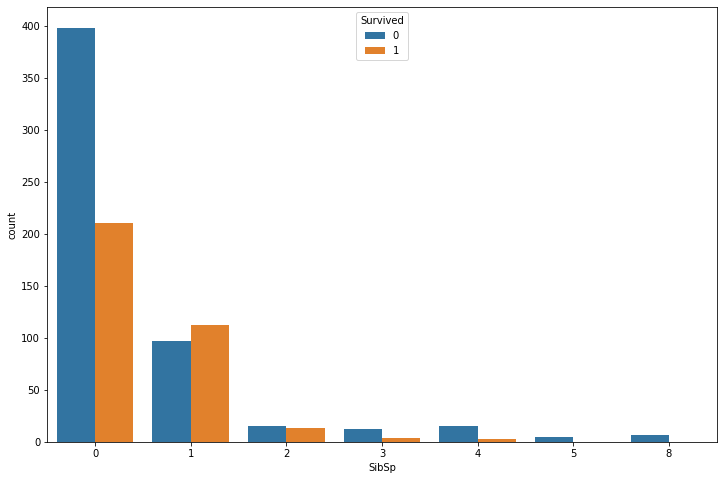

In [15]:
sns.countplot(x='SibSp',hue='Survived',data=df)

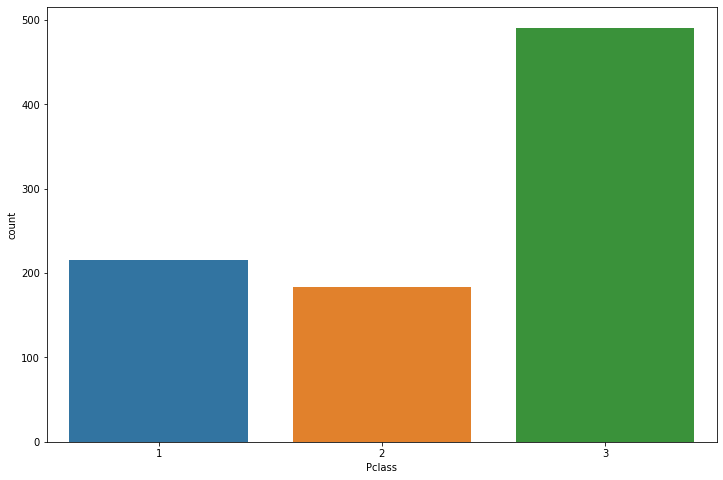

In [16]:
sns.countplot(x='Pclass',data=df)

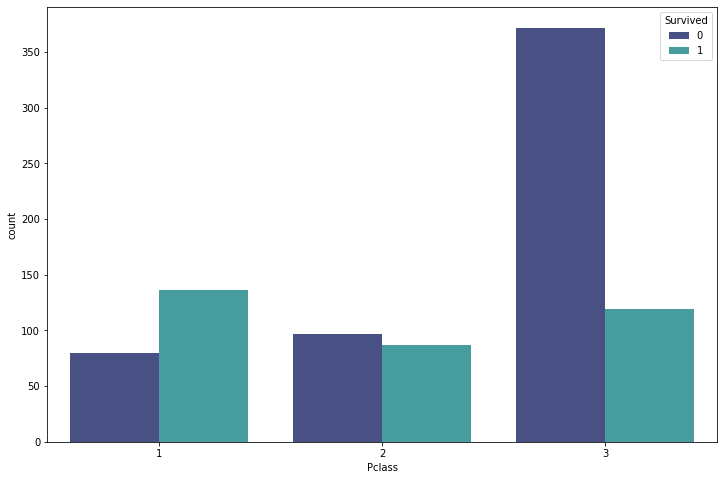

In [17]:
sns.countplot(x='Pclass',hue='Survived',data=df,palette='mako')

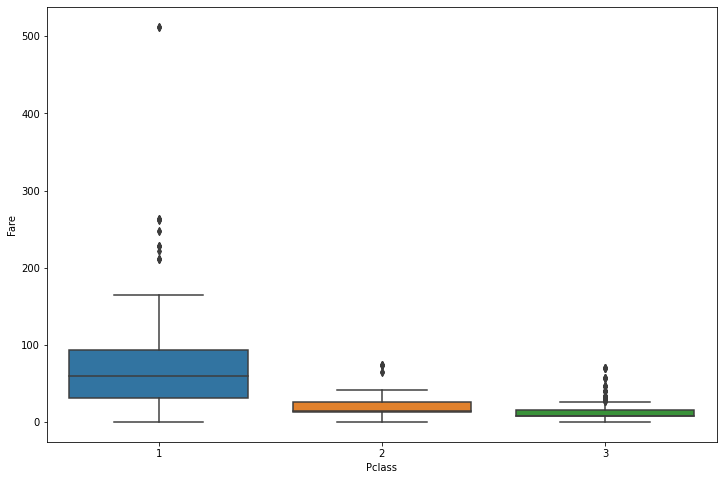

In [18]:
sns.boxplot(x='Pclass',y='Fare',data=df)

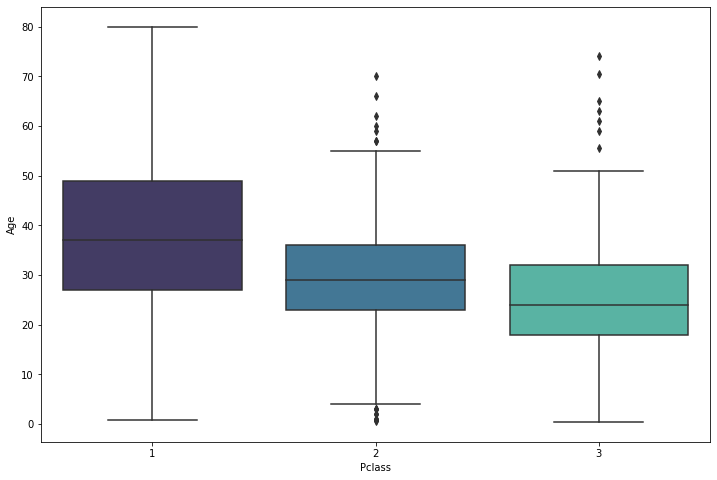

In [19]:
sns.boxplot(x='Pclass',y='Age',palette='mako',data=df)

Text(0, 0.5, 'correlation')

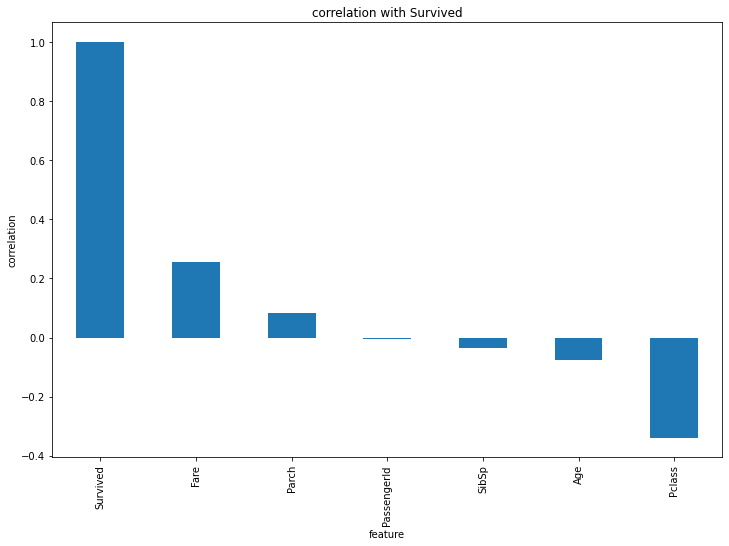

In [20]:
df.corr()['Survived'].sort_values(ascending=False).plot(kind='bar',title='correlation with Survived')
plt.xlabel('feature')
plt.ylabel('correlation')


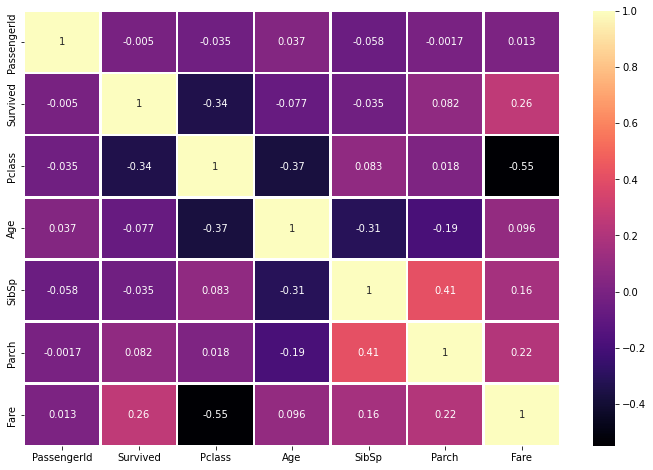

In [21]:
sns.heatmap(df.corr(),annot=True,linewidths=1.5,cmap='magma')

In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.drop(['PassengerId','Cabin'],axis=1,inplace=True)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['Age']=imputer.fit_transform(df[['Age']])

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [28]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [31]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
X = df.drop('Survived',axis=1)
y=df['Survived']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
y_train.value_counts()

0    384
1    238
Name: Survived, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [38]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,recall_score,precision_score,roc_auc_score,accuracy_score
from xgboost import XGBClassifier

In [39]:
logstic = LogisticRegression()
logstic.fit(X_train,y_train)
logstic_pre = logstic.predict(X_test)
print("logstic recall:",round(recall_score(y_test,logstic_pre),2))
print("logstic precision:",round(precision_score(y_test,logstic_pre),2))
print("logstic f1_score:",round(f1_score(y_test,logstic_pre),2))
print("logstic rou_auc_score:",round(roc_auc_score(y_test,logstic_pre),2))
print('accuracy_score :',round(accuracy_score(y_test,logstic_pre),2))

logstic recall: 0.77
logstic precision: 0.75
logstic f1_score: 0.76
logstic rou_auc_score: 0.81
accuracy_score : 0.82


In [40]:
prams = {
    
    "C":[0.1,0.2,0.3,0.4,0.5],
    "solver":["newton-cg","lbfgs","sag","saga"]
}

logstic_gd=GridSearchCV(logstic, param_grid = prams, verbose=True, 
                cv=10, scoring = "accuracy")
logstic_gd.fit(X_train, y_train)
print(logstic_gd.best_score_)
print(logstic_gd.best_estimator_)
print(logstic_gd.best_params_)
logsticgd_pre = logstic_gd.predict(X_test)
print("logstic recall:",round(recall_score(y_test,logsticgd_pre),2))
print("logstic precision:",round(precision_score(y_test,logsticgd_pre),2))
print("logstic f1_score:",round(f1_score(y_test,logsticgd_pre),2))
print("logstic rou_auc_score:",round(roc_auc_score(y_test,logsticgd_pre),2))
print('accuracy_score :',round(accuracy_score(y_test,logsticgd_pre),2))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.772095010252905
LogisticRegression(C=0.3, solver='newton-cg')
{'C': 0.3, 'solver': 'newton-cg'}
logstic recall: 0.77
logstic precision: 0.75
logstic f1_score: 0.76
logstic rou_auc_score: 0.81
accuracy_score : 0.81


In [41]:
#Default
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pre = xgb.predict(X_test)
print("xgb recall:",round(recall_score(y_test,xgb_pre),2))
print("xgb precision:",round(precision_score(y_test,xgb_pre),2))
print("xgb f1_score:",round(f1_score(y_test,xgb_pre),2))
print("xgb rou_auc_score:",round(roc_auc_score(y_test,xgb_pre),2))
print('accuracy_score :',round(accuracy_score(y_test,xgb_pre),2))

xgb recall: 0.73
xgb precision: 0.84
xgb f1_score: 0.78
xgb rou_auc_score: 0.82
accuracy_score : 0.84


In [49]:
params ={
    "max_depth":(2,8),
    "n_estimators":(100,400),
    "learning_rate":(0.5,1),
    "gamma":(0,0.2),
    "reg_lambda":(0.1,0.3),
    "reg_alpha":(0.1,0.3),
    "colsample_bytree":(0.8,1),
}

xgb_gd = GridSearchCV(xgb,param_grid=params,cv=5,scoring="roc_auc")
xgb_gd.fit(X_train,y_train)
print(xgb_gd.best_score_)
print(xgb_gd.best_estimator_)
print(xgb_gd.best_params_)
print('=======================')
xgbgd_pre = xgb_gd.predict(X_test)
print("xgb_gd recall:",round(recall_score(y_test,xgbgd_pre),2))
print("xgb_gd precision:",round(precision_score(y_test,xgbgd_pre),2))
print("xgb_gd f1_score:",round(f1_score(y_test,xgbgd_pre),2))
print("xgb_gd rou_auc_score:",round(roc_auc_score(y_test,xgbgd_pre),2))
print('accuracy_score :',round(accuracy_score(y_test,xgbgd_pre),2))

0.894192683598015
XGBClassifier(gamma=0.2, learning_rate=0.5, max_depth=8, reg_alpha=0.3,
              reg_lambda=0.1)
{'colsample_bytree': 1, 'gamma': 0.2, 'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 100, 'reg_alpha': 0.3, 'reg_lambda': 0.1}
xgb_gd recall: 0.74
xgb_gd precision: 0.79
xgb_gd f1_score: 0.76
xgb_gd rou_auc_score: 0.81
accuracy_score : 0.82


In [43]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train,y_train)
rf_pre = rf.predict(X_test)
print("rf recall:",round(recall_score(y_test,rf_pre),2))
print("rf precision:",round(precision_score(y_test,rf_pre),2))
print("rf f1_score:",round(f1_score(y_test,rf_pre),2))
print("accuracy_score:",(accuracy_score(y_test,rf_pre)))


rf recall: 0.7
rf precision: 0.76
rf f1_score: 0.73
accuracy_score: 0.8014981273408239


In [44]:
params = {
    "max_depth":(3,10),
    "n_estimators":(50,300),
    "min_samples_leaf":(1,5),
    "min_samples_split":(0.1,0.2),
    "min_impurity_decrease":(0,0.2),
}
rf_gd = RandomizedSearchCV(rf,param_distributions=params,cv=5,scoring="accuracy")
rf_gd.fit(X_train,y_train)
print(rf_gd.best_score_)
print(rf_gd.best_estimator_)
print(rf_gd.best_params_)
print('===================')
rfgd_pre = rf_gd.predict(X_test)
print("rf_gd recall:",round(recall_score(y_test,rfgd_pre),2))
print("rf_gd precision:",round(precision_score(y_test,rfgd_pre),2))
print("rf_gd f1_score:",round(f1_score(y_test,rfgd_pre),2))
print("rf_gd rou_auc_score:",round(roc_auc_score(y_test,rfgd_pre),2))
print("accuracy_score:",(accuracy_score(y_test,rfgd_pre)))


0.795560648501825
RandomForestClassifier(max_depth=10, min_impurity_decrease=0,
                       min_samples_leaf=5, min_samples_split=0.1,
                       n_estimators=50, random_state=123)
{'n_estimators': 50, 'min_samples_split': 0.1, 'min_samples_leaf': 5, 'min_impurity_decrease': 0, 'max_depth': 10}
rf_gd recall: 0.72
rf_gd precision: 0.73
rf_gd f1_score: 0.72
rf_gd rou_auc_score: 0.78
accuracy_score: 0.7902621722846442


In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pre = knn.predict(X_test)
print("knn recall:",round(recall_score(y_test,knn_pre),2))
print("knn precision:",round(precision_score(y_test,knn_pre),2))
print("knn f1_score:",round(f1_score(y_test,knn_pre),2))
print("knn rou_auc_score:",round(roc_auc_score(y_test,knn_pre),2))
print("accuracy_score:",(accuracy_score(y_test,knn_pre)))


knn recall: 0.7
knn precision: 0.77
knn f1_score: 0.73
knn rou_auc_score: 0.78
accuracy_score: 0.8052434456928839


In [46]:
params = {'algorithm': ['auto'], 'weights': ['uniform', 'distance'], 'leaf_size': list(range(1,50,5)), 
               'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,22]}
knn_gd=GridSearchCV(knn, param_grid = params, verbose=True, 
                cv=10, scoring = "roc_auc")
knn_gd.fit(X_train, y_train)
print(knn_gd.best_score_)
print(knn_gd.best_estimator_)
print(knn_gd.best_params_)
print('=================')
knngd_pre = knn_gd.predict(X_test)
print("knngd_pre recall:",round(recall_score(y_test,knngd_pre),2))
print("knngd_pre precision:",round(precision_score(y_test,knngd_pre),2))
print("knngd_pre f1_score:",round(f1_score(y_test,knngd_pre),2))
print("knngd_pre rou_auc_score:",round(roc_auc_score(y_test,knngd_pre),2))
print("accuracy_score:",(accuracy_score(y_test,knngd_pre)))


Fitting 10 folds for each of 360 candidates, totalling 3600 fits
0.8770447119823851
KNeighborsClassifier(leaf_size=11, n_neighbors=8, weights='distance')
{'algorithm': 'auto', 'leaf_size': 11, 'n_neighbors': 8, 'weights': 'distance'}
knngd_pre recall: 0.7
knngd_pre precision: 0.82
knngd_pre f1_score: 0.75
knngd_pre rou_auc_score: 0.8
accuracy_score: 0.8239700374531835


In [47]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pre = svc.predict(X_test)
print("knn recall:",round(recall_score(y_test,svc_pre),2))
print("knn precision:",round(precision_score(y_test,svc_pre),2))
print("knn f1_score:",round(f1_score(y_test,svc_pre),2))
print("knn rou_auc_score:",round(roc_auc_score(y_test,svc_pre),2))
print("accuracy_score:",(accuracy_score(y_test,svc_pre)))


knn recall: 0.66
knn precision: 0.85
knn f1_score: 0.74
knn rou_auc_score: 0.79
accuracy_score: 0.8239700374531835


In [48]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
svc_gd=GridSearchCV(svc, param_grid = parameters, verbose=True, 
                cv=10, scoring = "accuracy")
svc_gd.fit(X_train, y_train)
print(svc_gd.best_score_)
print(svc_gd.best_estimator_)
print(svc_gd.best_params_)
print('=================')
svcgd_pre = svc_gd.predict(X_test)
print("knngd_pre recall:",round(recall_score(y_test,svcgd_pre),2))
print("knngd_pre precision:",round(precision_score(y_test,svcgd_pre),2))
print("knngd_pre f1_score:",round(f1_score(y_test,svcgd_pre),2))
print("knngd_pre rou_auc_score:",round(roc_auc_score(y_test,svcgd_pre),2))
print("accuracy_score:",(accuracy_score(y_test,svcgd_pre)))


Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8151401230348598
SVC(C=0.75, gamma=0.3)
{'C': 0.75, 'gamma': 0.3, 'kernel': 'rbf'}
knngd_pre recall: 0.67
knngd_pre precision: 0.83
knngd_pre f1_score: 0.74
knngd_pre rou_auc_score: 0.79
accuracy_score: 0.8202247191011236
